<h1><center>IS 362 – Project 1</center></h1>

### The chart above describes arrival delays for two airlines across five destinations. Your task is to

### (1) Create a .CSV file (or optionally, a MySQL database!) that includes all of the information below. You may change
### the structure of the information as you like.

### (2) Read the information from your .CSV file into pandas, and perform analysis to compare the arrival delays for the
### two airlines.

### (3) Your code should be in a Jupyter (IPython) notebook (in GitHub), and should include narrative descriptions of your
### analysis and conclusions.

In [1]:
import csv
import pandas as pd
import matplotlib

### Now, we read from our CSV. Pandas makes it really easy to load CSV data into a pandas data object

In [2]:
data = pd.read_csv('flight_arrivals.csv')

In [3]:
data

,Airline,arrival_type,destination,count
0,Alaska,on time,Los Angeles,497
1,Alaska,on time,Phoenix,221
2,Alaska,on time,San Diego,212
3,Alaska,on time,San Francisco,503
4,Alaska,on time,Seattle,1841
5,Alaska,delayed,Los Angeles,62
6,Alaska,delayed,Phoenix,12
7,Alaska,delayed,San Diego,20
8,Alaska,delayed,San Francisco,102
9,Alaska,delayed,Seattle,305


###  Top five on time flights to their respective destinations

In [4]:
data.sort_values(by=['count', 'arrival_type'], ascending=[False, False]).head()

,Airline,arrival_type,destination,count
11,AM West,on time,Phoenix,4840
4,Alaska,on time,Seattle,1841
10,AM West,on time,Los Angeles,694
3,Alaska,on time,San Francisco,503
0,Alaska,on time,Los Angeles,497


### Only the 'on time' flights

In [5]:
data[data['arrival_type'] == 'on time']['count']

0      497
1      221
2      212
3      503
4     1841
10     694
11    4840
12     383
13     320
14     201
Name: count, dtype: int64

### The mean (average) value among all on time flights

In [6]:
data[data['arrival_type'] == 'on time']['count'].mean()

971.2

### group by airline and arrivaltype and compare the average delayed and on time flights from both airlines

In [7]:
data.groupby(['Airline', 'arrival_type']).mean()

count
Airline arrival_type        
AM West delayed        157.4
        on time       1287.6
Alaska  delayed        100.2
        on time        654.8

### Average on time flights are a lot higher for AM West than Alaska

In [8]:
n = data.groupby(['Airline', 'arrival_type']).sum()

In [9]:
n

count
Airline arrival_type       
AM West delayed         787
        on time        6438
Alaska  delayed         501
        on time        3274

In [10]:
(n.iloc[1] / n.iloc[3]) * 100

count    196.640195
dtype: float64

### On time flights from AM West are 196.64% higher than from Alaska

Airline  arrival_type
AM West  delayed         AxesSubplot(0.125,0.125;0.775x0.755)
         on time         AxesSubplot(0.125,0.125;0.775x0.755)
Alaska   delayed         AxesSubplot(0.125,0.125;0.775x0.755)
         on time         AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

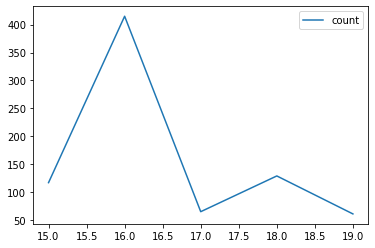

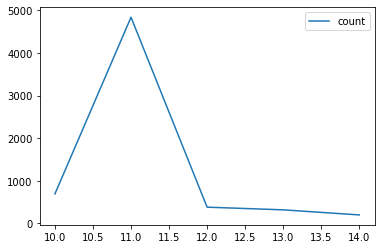

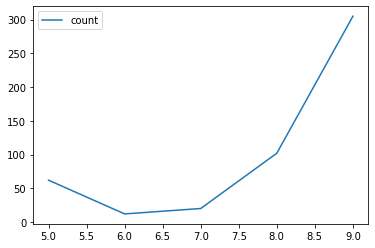

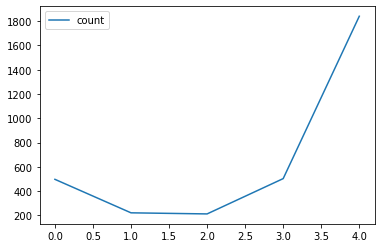

In [11]:
data.groupby(['Airline','arrival_type']).plot()

# Conclusion
### The analysis finds that total on time flights out of AM West are 196.64% higher than those out of Alaska. 

### Also, the top on time flights arrived in Phoenix, with Seattle coming in 2nd. 

### Overall, the average on time flights out of AM West were higher than those out of Alaska. 

### Though, Alaska's (100.2) average delayed flights were relatively close to those of AM West (157.4). 

### AM West has greater on time flights and fewer delays when compared to Alaska.

### Thus, AM West has the better service.